## Binarization Algorithm

#### This is an image binarization algorithm that uses the Otsu's method to find the optimal threshold value for the binarization of the image.
---

In [221]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [188]:
# Loss function
def get_loss(num, bin, thresh, tuning_method, under_tuning, over_tuning):
     bin = bin[:-1]
     
     # distance if the pixel is under the threshold
     dist_under_thresh = bin[:thresh]
     # distance if the pixel is over the threshold
     dist_over_thresh = 255 - bin[thresh:]
     
     # Tune according to 'skewness' and value inserted by the user
     if tuning_method ==  'Auto':
         
         weighted = bin*num
         m = np.sum(weighted)/np.sum(num)
         tuning  = np.abs(m-127)
        
         if m > (255/2 + 20):
             tuned_dist_under_thresh = dist_under_thresh
             tuned_dist_over_thresh = dist_over_thresh + tuning
         elif m < (255/2 - 20):
             tuned_dist_under_thresh = dist_under_thresh + tuning
             tuned_dist_over_thresh = dist_over_thresh
         else:
             tuned_dist_under_thresh = dist_under_thresh
             tuned_dist_over_thresh = dist_over_thresh
          
     else:
         tuned_dist_under_thresh = dist_under_thresh + under_tuning
         tuned_dist_over_thresh = dist_over_thresh + over_tuning

         
     # concatenate the two parts
     dist_mat = np.concatenate((tuned_dist_under_thresh, tuned_dist_over_thresh))
     loss = np.sum(num * dist_mat) # Loss function
     return loss

def get_best_thresh(num, bin, tuning_method = 'Auto', under_tuning = None, over_tuning = None, show_loss = False):
	loss_list = []
	
	if tuning_method == 'Manual':
		if under_tuning is None or over_tuning is None:
			print('Please insert values for tuning')
			return
	else:
		weighted = bin[:-1]*num
		m = np.sum(weighted)/np.sum(num)
		print('Tuning parameter (127 - mean): ', np.abs(m-127))

	for i in range(1,255):
		loss = get_loss(num, bin, i, tuning_method, under_tuning, over_tuning)
		loss_list.append(loss)
	min_loss = np.min(loss_list)
	best_thresh = np.argmin(loss_list)
	if show_loss:
		plt.figure()
		plt.plot(loss_list)
		plt.title('Loss function')

	return best_thresh, min_loss, loss_list

def apply_thresh(img_gray, thresh, show_img = False):
	img_bin = img_gray > thresh # Mask
	if show_img:
		plt.figure()
		plt.imshow(img_bin, cmap='gray')
		plt.title('Binarized'), plt.xticks([]), plt.yticks([])
	return img_bin

Tuning parameter (127 - mean):  24.2979296875
The best threshold is:  115
The minimum loss is:  91245281.24355468


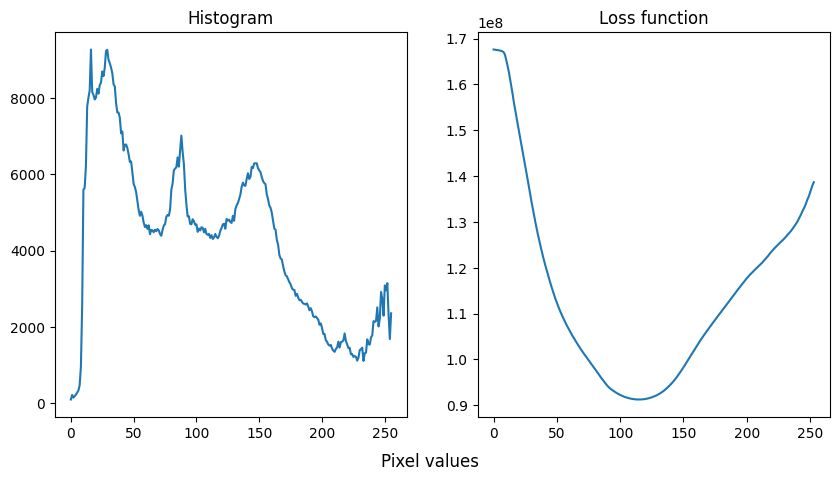

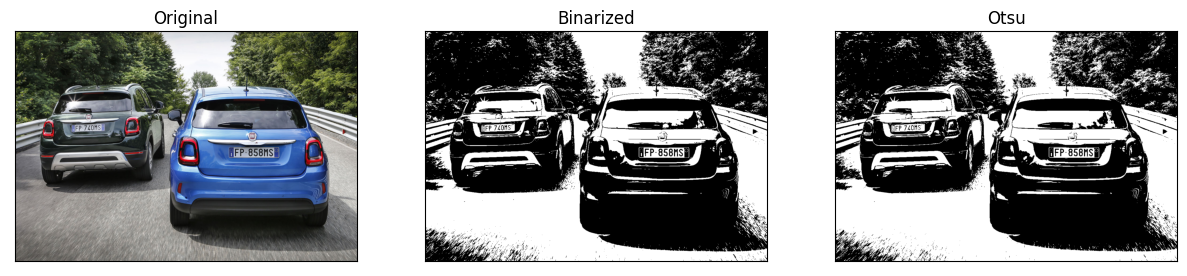

In [215]:
# Load image
img = cv.imread('images/carplates.jpeg', cv.IMREAD_COLOR)

# Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Compute the histogram
num, bin= np.histogram(img_gray.ravel(), 256, [0, 256])

# Get and apply the best threshold
best_thresh, min_loss, losses = get_best_thresh(num, bin, tuning_method = 'Auto', show_loss=False)
img_bin = apply_thresh(img_gray, best_thresh, show_img = False)

print('The best threshold is: ', best_thresh)
print('The minimum loss is: ', min_loss)

# Binarization with Otsu's method
img_otsu = cv.threshold(img_gray, 0, 255, cv.THRESH_OTSU)[1]

# Show the results
# Histogram and Loss
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].set_title('Histogram')
axs[0].plot(num)
axs[1].set_title('Loss function')
axs[1].plot(losses)
fig.text(0.5, 0.01, 'Pixel values', ha='center', fontsize=12)

# Images comparison
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

# Plot the original image in the first subplot
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].set_xticks([]), axs[0].set_yticks([])

# Plot the binarized image in the second subplot
axs[1].imshow(img_bin, cmap='gray')
axs[1].set_title('Binarized')
axs[1].set_xticks([]), axs[1].set_yticks([])

# Plot the Otsu image in the third subplot
axs[2].imshow(img_otsu, cmap='gray')
axs[2].set_title('Otsu')
axs[2].set_xticks([]), axs[2].set_yticks([])

# Show the plots
plt.show()


In [223]:
# Save the binarized image
# Check if the file already exists
if os.path.exists('Images/carplates_binarized.jpeg'):
    print(f"Warning: The file {'Images/carplates_binarized.jpeg'} already exists. Skipping save operation.")
else:
	# Convert it to 0 and 255
	img_bin = (img_bin * 255).astype(np.uint8)

	# Save the binary image as a JPEG file
	cv.imwrite('Images/carplates_binarized.jpeg', img_bin)
